# Mass and isotopes

This tutorial includes following fundamental operations related to molecular mass and isotopes.

- Molecular weight (Relative molecular mass)
- Calculated exact mass and monoisotopic mass
- Isotopic composition
- Simulate mass spectrum

## Loading packages

This tutorial uses `PlotlyJS.jl` to display simulated mass spectrum.

In [1]:
import Pkg
Pkg.activate("..")
using MolecularGraph
using PlotlyJS

Activating environment at `~/Workspace/MolecularGraph.jl_notebook/Project.toml`


┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1273


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7743221617512784794\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17214213248997225686\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7743221617512784794\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Molecular weight (Relative molecular mass)

Molecular weight (Relative molecular mass) can be calculated by `standardweight` method.

In [85]:
standardweight(smilestomol("CCO"))

(46.069, 0.004529999999995926)

- `standardweight` returns the tuple of standard weight and its uncertainty, respectively. The result shown above means the molecular weight of C2H5O is 46.069±0.005.
- If you dont need uncertainty, give Float64 type to the method. Then the value will be rounded at 2 digits after the decimal point.

In [86]:
standardweight(Float64, smilestomol("CCO"))

46.07

## Calculated exact mass and monoisotopic mass

Both `exactmass` and `monoisotopicmass` returns exact mass of the given molecule. The difference is that `exactmass` considers atomic mass specified in `Atom.mass` fields of atoms whereas `monoisotopicmass` always returns exact mass of the molecule consists of the most abundant isotopes in terrestrial sources.

In [90]:
etohd6 = smilestomol("[2H]C([2H])([2H])C([2H])([2H])O[2H]")

println("Monoisotopic: ", monoisotopicmass(etohd6))
println("Exact: ", exactmass(etohd6))
implicithcount(etohd6)

Monoisotopic: (46.041864812949996, 7.1e-10)
Exact: (46.041864812949996, 7.1e-10)


9-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [19]:
mol = smilestomol("c1cc(ccc1[C@H]([C@@H](CO)NC(=O)C(Cl)Cl)O)[N+](=O)[O-]")
rcds = simulatemassspec(mol)
arr = zeros(Float64, length(rcds), 2)
for (i, rcd) in enumerate(rcds)
    arr[i, :] = [rcd[1], rcd[2]]
end

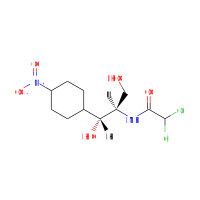

data: [
  "scatter with fields marker, mode, name, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y",
  "scatter with fields hoverinfo, line, mode, type, x, and y"
]

layout: "layout with fields height, margin, showlegend, width, xaxis, and yaxis"

In [84]:
display("image/svg+xml", drawsvg(mol, 200, 200))

datapoints= scatter(
    x=arr[:, 1], y=arr[:, 2], name="Intensity",
    mode="markers", marker_size=2, marker_color="#2ca02c"
)
lines = map(eachrow(arr)) do r
    scatter(
        x=[r[1], r[1]], y=[0, r[2]],
        mode="lines", line_width=2, line_color="#2ca02c", hoverinfo="skip"
    )
end
data = Base.typed_vcat(GenericTrace, datapoints, lines)
layout = Layout(
    width=400, height=300,
    margin=Dict(:l => 50, :b => 50),
    showlegend=false,
    yaxis=Dict(:title => "Relative intensity"), xaxis=Dict(:title => "Mass")
)
plot(data, layout)